# Difference between Incidents 2013-2019 and 2020; looking at Jan-May


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point

## Read in the cleaned and merged files to begin indepth analysis
### The datetime has reverted to an object and must be fixed to allow easy access to manipulation

In [3]:
calls = pd.read_csv('../data/calls_5months.csv',low_memory=False)

In [4]:
incidents = pd.read_csv('../data/incidents_5months.csv',low_memory=False)

In [5]:
precincts = gpd.read_file('../data/Police Precinct District Outlines (GIS).geojson')


In [6]:
calls.call_received = pd.to_datetime(calls.call_received)

In [54]:
incidents.iloc[:,10:]

,zip,rpa,zone,location_code,location_description,offense_number,offense_nibrs,offense_description,weapon_primary,weapon_description,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,latitude,longitude,mapped_location,occurred_year,occurred_month
0,nan,NaN,NaN,26.0,SPECIALTY STORE,1.0,23C,SHOPLIFTING,17,NONE,...,BUSINESS,NaN,NaN,NaN,NaN,36.170,-86.810,"(36.17, -86.81)",2013,1
1,37076,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,35A,MARIJUANA - POSSESS,17,NONE,...,SOCIETY,NaN,NaN,NaN,NaN,36.198,-86.612,"(36.198, -86.612)",2013,1
2,nan,NaN,NaN,26.0,SPECIALTY STORE,1.0,220,BURGL - FORCED ENTRY-NONRESID,7,CLUB,...,BUSINESS,NaN,NaN,NaN,NaN,36.150,-86.780,"(36.15, -86.78)",2013,1
3,37207,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",2.0,35B,DRUG PARAPHERNALIA- UNLAWFUL USE,15,OTHER,...,SOCIETY,NaN,NaN,NaN,NaN,36.200,-86.770,"(36.2, -86.77)",2013,1
4,37208,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,35A,MARIJUANA - POSSESS,13,DRUGS,...,SOCIETY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393517,nan,NaN,NaN,20.0,"PARKING LOT, GARAGE",1.0,23F,BURGLARY- MOTOR VEHICLE,17,NONE,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,36.310,-86.690,NaN,2020,4
393518,37207,1965.0,221.0,90.0,APARTMENT,1.0,13B,SIMPLE ASSLT,16,Unarmed,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,36.183,-86.768,NaN,2020,4
393519,37115,NaN,NaN,20.0,"PARKING LOT, GARAGE",1.0,13B,SIMPLE ASSLT,09,PERSONAL (HANDS),...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,36.264,-86.724,NaN,2020,4
393520,37115,1721.0,727.0,14.0,"HOTEL, MOTEL, ETC.",1.0,740,TRANSPORT,17,NONE,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,36.293,-86.695,NaN,2020,4


In [7]:
incidents.incident_occurred=pd.to_datetime(incidents.incident_occurred)

In [8]:
incidents.incident_reported=pd.to_datetime(incidents.incident_reported)

In [9]:
incidents.zip = incidents.zip.astype(str)

In [10]:
incidents.zip = incidents.zip.str[:5]
print(incidents.zip)  

0           nan
1         37076
2           nan
3         37207
4         37208
          ...  
393517      nan
393518    37207
393519    37115
393520    37115
393521    37203
Name: zip, Length: 393522, dtype: object


### The below value_counts() shows that the total incidents in 2020 has gone down in regards to the last 7 years. This graph also shows a relative lessening of crime in Nashville over the years. This is not enough to prove that social distancing keeps crime down. Since January, February, and March were not as effected by the pandemic we will take those first two months out as well to see if the remaining 3 show a more specific result.

In [11]:
incidents.occurred_year.value_counts()

2018    51262
2016    51252
2017    50983
2015    48943
2014    48690
2019    48257
2013    48141
2020    45994
Name: occurred_year, dtype: int64

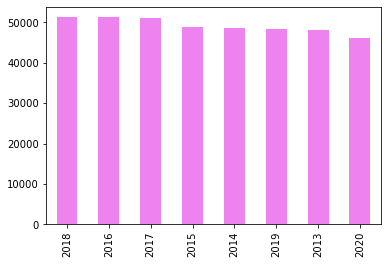

In [12]:
incidents.occurred_year.value_counts().plot(kind='bar',color='violet');

# Seaborn FacetGrid to show difference in incidents over 2013-2020

In [13]:
facet_incidents = incidents.groupby('occurred_month')['occurred_year'].value_counts().to_frame()

In [14]:
facet_incidents.columns =['incidents_count']

In [15]:
facet_incidents=facet_incidents.reset_index()

### Bar FacetGrid

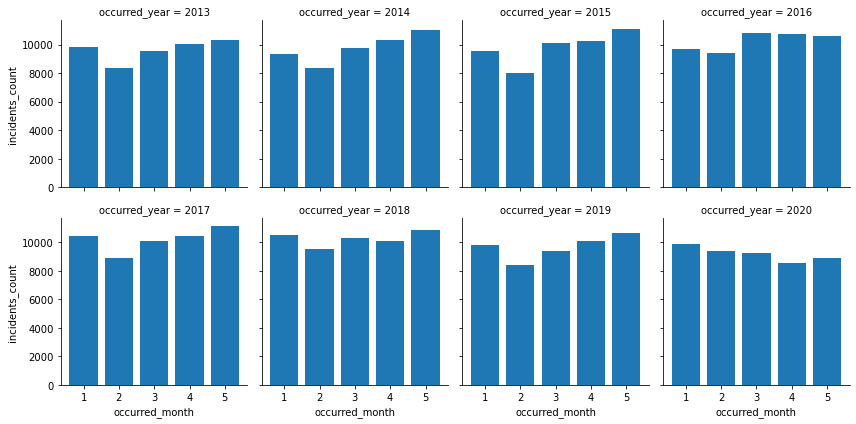

In [16]:
g = sns.FacetGrid(facet_incidents, col = 'occurred_year',col_wrap=4)
g = g.map(plt.bar, 'occurred_month', 'incidents_count')

### Line FacetGrid

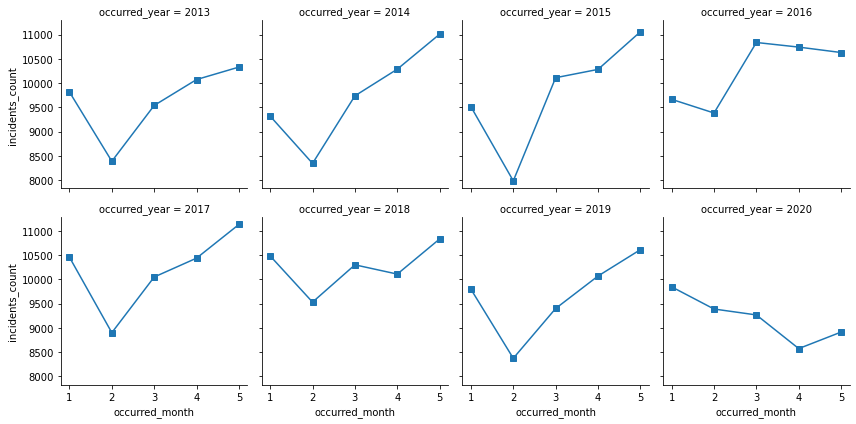

In [17]:
g = sns.FacetGrid(facet_incidents, col = 'occurred_year',col_wrap=4)
g = g.map(plt.plot, 'occurred_month', 'incidents_count',marker='s')

### What zipcodes have had the most crime in the last 8 years?

In [18]:
crime_zip_year = incidents.groupby('occurred_year')['zip'].value_counts().to_frame()

In [19]:
crime_zip_year.columns = ['count']

In [20]:
crime_zip_year = crime_zip_year.reset_index()

In [21]:
crime_zip_year = crime_zip_year[crime_zip_year.zip != 'nan']

In [22]:
crime_zip_year

,occurred_year,zip,count
1,2013,37207,3419
2,2013,37211,2675
3,2013,37115,2583
4,2013,37013,2127
5,2013,37206,2006
...,...,...,...
291,2020,37143,6
292,2020,37240,3
293,2020,37122,2
294,2020,37090,1


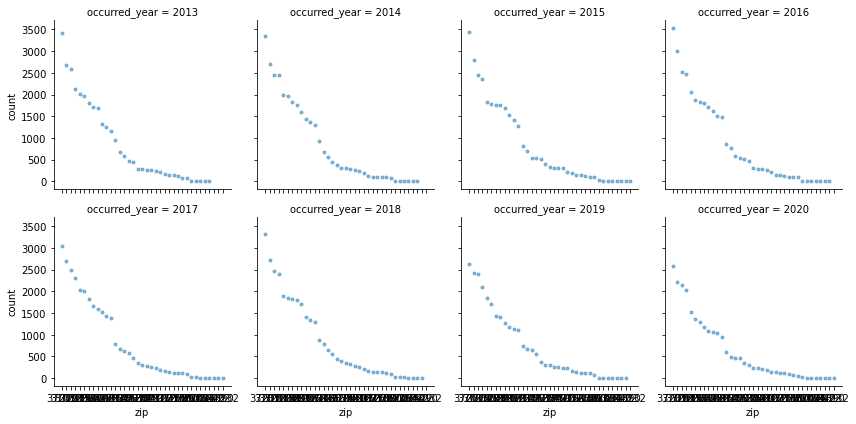

In [23]:

c = sns.FacetGrid(crime_zip_year, col = 'occurred_year',col_wrap=4)
c = c.map(plt.scatter, 'zip', 'count',marker='.',alpha = 0.5)
# NaNs in the zip column were dropped to better show the differences in the years


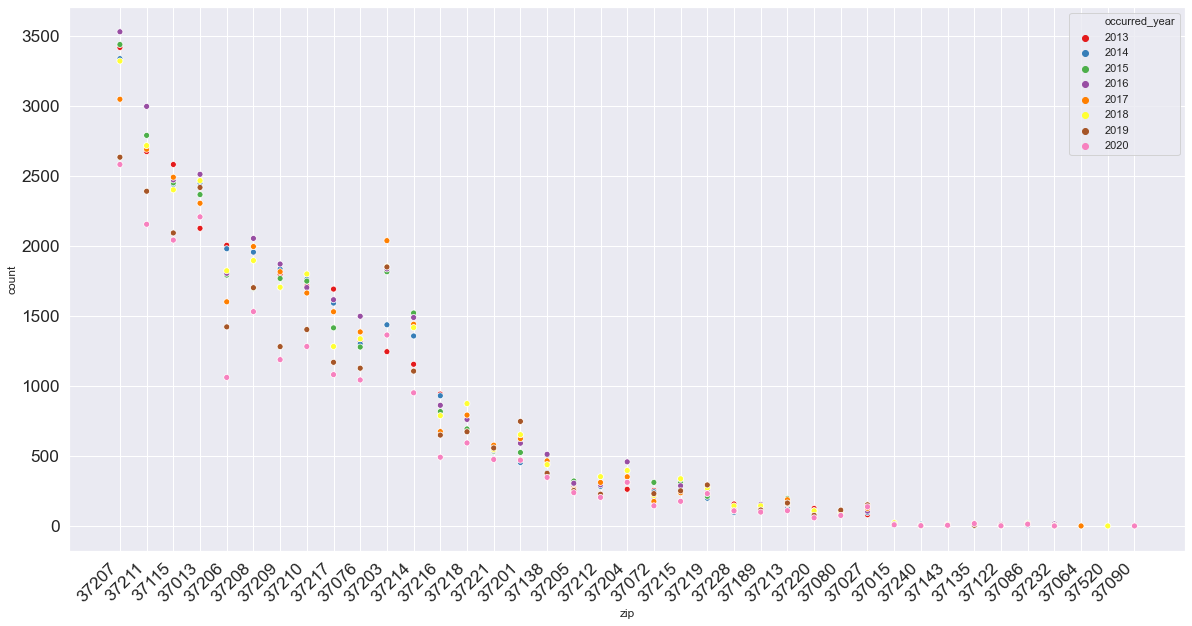

In [24]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
plt.figure(figsize=(20,10))
sns.set()
t = sns.scatterplot(#figsize = (20,10),
                x="zip", 
                y="count",
                #size = 'count',
                hue="occurred_year",
                legend='full',
                palette="Set1",
                data=crime_zip_year)

plt.yticks(fontweight = 'light',
          fontsize ='x-large')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

#### The above scatter plot while busy does show that the 2020 total incidents is down for the majority of the zipcodes. Now we will look into the Victim Types to see if any discrepancies arise

In [25]:
year_list=[2013,2014,2015,2016,2017,2018,2019]

In [26]:
incidents_12_19 = incidents[incidents.occurred_year.isin(year_list)]

In [27]:
incidents_12_19.occurred_year.value_counts()

2018    51262
2016    51252
2017    50983
2015    48943
2014    48690
2019    48257
2013    48141
Name: occurred_year, dtype: int64

In [28]:
incidents_20 = incidents[incidents.occurred_year == 2020]

In [29]:
incidents.iloc[:,10:25]

,zip,rpa,zone,location_code,location_description,offense_number,offense_nibrs,offense_description,weapon_primary,weapon_description,victim_number,domestic_related,victim_type,victim_description,victim_gender
0,nan,NaN,NaN,26.0,SPECIALTY STORE,1.0,23C,SHOPLIFTING,17,NONE,1,No,B,BUSINESS,NaN
1,37076,NaN,NaN,22.0,"RESIDENCE, HOME",1.0,35A,MARIJUANA - POSSESS,17,NONE,1,No,S,SOCIETY,NaN
2,nan,NaN,NaN,26.0,SPECIALTY STORE,1.0,220,BURGL - FORCED ENTRY-NONRESID,7,CLUB,1,No,B,BUSINESS,NaN
3,37207,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",2.0,35B,DRUG PARAPHERNALIA- UNLAWFUL USE,15,OTHER,1,No,S,SOCIETY,NaN
4,37208,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,35A,MARIJUANA - POSSESS,13,DRUGS,1,No,S,SOCIETY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393517,nan,NaN,NaN,20.0,"PARKING LOT, GARAGE",1.0,23F,BURGLARY- MOTOR VEHICLE,17,NONE,1,No,I,INDIVIDUAL (18 AND OVER),F
393518,37207,1965.0,221.0,90.0,APARTMENT,1.0,13B,SIMPLE ASSLT,16,Unarmed,1,Yes,I,INDIVIDUAL (18 AND OVER),F
393519,37115,NaN,NaN,20.0,"PARKING LOT, GARAGE",1.0,13B,SIMPLE ASSLT,09,PERSONAL (HANDS),1,Yes,I,INDIVIDUAL (18 AND OVER),F
393520,37115,1721.0,727.0,14.0,"HOTEL, MOTEL, ETC.",1.0,740,TRANSPORT,17,NONE,1,No,I,INDIVIDUAL (18 AND OVER),M


In [30]:
incidents.offense_number.value_counts()

1.0    348873
2.0     38393
3.0      5107
4.0       705
5.0        70
6.0        13
7.0         1
8.0         1
0.0         1
Name: offense_number, dtype: int64

In [31]:
incidents_12_19.location_code.value_counts().reset_index()

,index,location_code
0,22.0,126393
1,13.0,51761
2,20.0,45265
3,90.0,34952
4,8.0,10688
5,14.0,8734
6,26.0,6975
7,7.0,6332
8,5.0,5995
9,23.0,5705


In [32]:
incidents_20.location_code.value_counts().reset_index()

,index,location_code
0,22.0,15235
1,20.0,8113
2,13.0,5745
3,90.0,5698
4,7.0,1466
5,8.0,1099
6,14.0,1083
7,26.0,902
8,23.0,708
9,5.0,633


### lets look to see the victim type. See if juveniles are in more danger in certain places.

In [33]:
incidents.victim_description.str.contains('juvenile')

0         False
1         False
2         False
3         False
4         False
          ...  
393517    False
393518    False
393519    False
393520    False
393521    False
Name: victim_description, Length: 393522, dtype: object

In [34]:
incidents.iloc

In [35]:
incidents.incident_status_code.value_counts()

O    165226
U    105570
A     91603
R     26797
P      3701
J       413
D       185
E         6
Name: incident_status_code, dtype: int64

In [36]:
incidents_j = incidents[incidents.incident_status_code == 'J']

In [88]:
incidents_j.location_description.value_counts()

School-Elementary/Secondary    171
RESIDENCE, HOME                110
PARKING LOT, GARAGE             28
HIGHWAY, ROAD, ALLEY            26
APARTMENT                       22
School-College/University       13
DEPARTMENT, DISCOUNT STORE      13
SPECIALTY STORE                  5
SERVICE, GAS STATION             4
COMMERCIAL, OFFICE BUILDING      3
PARK                             3
AIR, BUS, TRAIN TERMINAL         2
HOTEL, MOTEL, ETC.               2
BAR, NIGHT CLUB                  1
Park/Playground                  1
CHURCH, SYNAGOGUE, TEMPLE        1
UNIVERSITY, COLLEGE CAMPUS       1
RESTAURANT                       1
Shopping Mall                    1
Industrial Site                  1
LIQUOR STORE                     1
OTHER, UNKNOWN                   1
JAIL, PRISON                     1
CONVENIENCE STORE                1
Name: location_description, dtype: int64

In [37]:
incidents_j.victim_description.value_counts()

INDIVIDUAL (18 AND OVER)    294
SOCIETY                      64
BUSINESS                     29
GOVERNMENT                   22
UNKNOWN                       2
RELIGIOUS                     1
POLICE OFFICER                1
Name: victim_description, dtype: int64

In [38]:
incidents_j[incidents_j.occurred_year == 2020]

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,latitude,longitude,mapped_location,occurred_year,occurred_month
348339,20200374651_21,20200374651,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2020-05-27 22:00:00,2020-05-28 09:01:00,5200 EDMONDSON PIKE,...,BUSINESS,NaN,NaN,NaN,NaN,36.060,-86.741,NaN,2020,5
351002,20200374651_11,20200374651,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2020-05-27 22:00:00,2020-05-28 09:01:00,5200 EDMONDSON PIKE,...,BUSINESS,NaN,NaN,NaN,NaN,36.060,-86.741,NaN,2020,5
351212,20200097984_11,20200097984,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2020-02-10 06:30:00,2020-02-10 08:53:00,400 KIRKPATRICK AVE,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,NON RESIDENT,36.169,-86.754,NaN,2020,2
351213,20200097984_21,20200097984,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2020-02-10 06:30:00,2020-02-10 08:53:00,400 KIRKPATRICK AVE,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,NON RESIDENT,36.169,-86.754,NaN,2020,2
351214,20200097984_22,20200097984,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2020-02-10 06:30:00,2020-02-10 08:53:00,400 KIRKPATRICK AVE,...,BUSINESS,NaN,NaN,NaN,NaN,36.169,-86.754,NaN,2020,2
351240,20200117348_11,20200117348,S,SUSPECT,J,"JUVENILE, NO CUSTODY",Closed,2020-02-18 09:56:00,2020-02-18 11:02:00,500 ELYSIAN FIELDS RD,...,SOCIETY,NaN,NaN,NaN,NaN,36.084,-86.737,NaN,2020,2
359928,20200294436_11,20200294436,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2020-04-25 19:00:00,2020-04-25 20:03:00,1400 BRENTWOOD TER,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,36.047,-86.743,NaN,2020,4
360965,20200304639_11,20200304639,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2020-04-29 18:37:00,2020-04-29 20:05:00,500 HAYNES ST,...,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,36.205,-86.789,NaN,2020,4
367460,20200011712_11,20200011712,D,DISPATCHED,J,"JUVENILE, NO CUSTODY",Closed,2020-01-06 02:39:00,2020-01-06 18:01:00,4300 ENCHANTED CIR,...,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,36.209,-86.857,"(36.209, -86.857)",2020,1
367960,20200016209_11,20200016209,O,NaN,J,"JUVENILE, NO CUSTODY",Closed,2020-01-08 08:30:00,2020-01-08 09:38:00,5800 PETTUS RD,...,GOVERNMENT,NaN,NaN,NaN,NaN,36.022,-86.662,"(36.022, -86.662)",2020,1


In [39]:
incidents_j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 10191 to 388070
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   primary_key                  413 non-null    object        
 1   incident_number              413 non-null    int64         
 2   report_type                  413 non-null    object        
 3   report_type_description      370 non-null    object        
 4   incident_status_code         413 non-null    object        
 5   incident_status_description  413 non-null    object        
 6   investigation_status         413 non-null    object        
 7   incident_occurred            413 non-null    datetime64[ns]
 8   incident_reported            413 non-null    datetime64[ns]
 9   incident_location            413 non-null    object        
 10  zip                          413 non-null    object        
 11  rpa                          334 non-n

### Precincts with Geopandas

In [40]:
print(precincts.crs)
precincts

epsg:4326


,precinct,shape_area,shape_len,geometry
0,CENTRAL,98541971.0257,46234.6717307,"MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ..."
1,EAST,562260180.986,90261.1338967,"MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ..."
2,HERMITAGE,2496337143.44,521944.947628,"MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ..."
3,MADISON,1913402934.01,254564.86409,"MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ..."
4,MIDTOWN-HILLS,1317030605.73,187104.273068,"MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ..."
5,NORTH,3287881220.97,334895.629437,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ..."
6,SOUTH,1936875931.39,422441.749973,"MULTIPOLYGON (((-86.63676 36.07248, -86.63664 ..."
7,WEST,3037053503.78,319947.055426,"MULTIPOLYGON (((-86.90759 36.13557, -86.90545 ..."


In [41]:
precincts.crs = "EPSG:4326"
print(precincts.crs)

EPSG:4326


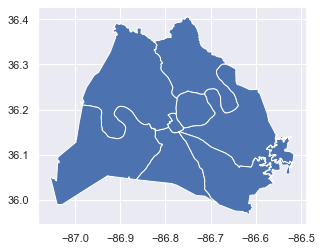

In [42]:
precincts.plot();

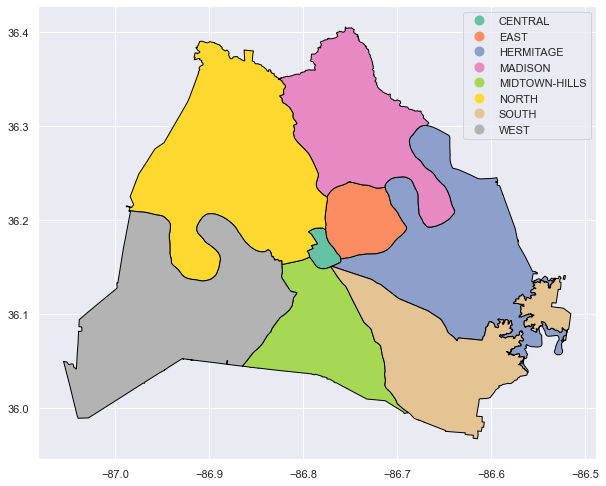

In [43]:
precincts.plot(column = 'precinct', figsize=(10, 10),
              edgecolor = 'black',
              legend = True,# legend_kwds = leg_kwds, 
              cmap = 'Set2');


In [44]:
area_center = [36.175861, -86.809556]

In [48]:
map_precinct = folium.Map(location =  area_center, zoom_start = 12)
folium.GeoJson(precincts).add_to(map_precinct)



map_precinct

In [ ]:
for row_index, row_values in sirens_in_hoods.iterrows():
    loc = [row_values['lat'], row_values['long']]
    pop = str(row_values['name'])

In [55]:
precincts

,precinct,shape_area,shape_len,geometry
0,CENTRAL,98541971.0257,46234.6717307,"MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ..."
1,EAST,562260180.986,90261.1338967,"MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ..."
2,HERMITAGE,2496337143.44,521944.947628,"MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ..."
3,MADISON,1913402934.01,254564.86409,"MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ..."
4,MIDTOWN-HILLS,1317030605.73,187104.273068,"MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ..."
5,NORTH,3287881220.97,334895.629437,"MULTIPOLYGON (((-86.90742 36.39053, -86.90725 ..."
6,SOUTH,1936875931.39,422441.749973,"MULTIPOLYGON (((-86.63676 36.07248, -86.63664 ..."
7,WEST,3037053503.78,319947.055426,"MULTIPOLYGON (((-86.90759 36.13557, -86.90545 ..."


In [67]:
incidents[(incidents.zone >= 400) &(incidents.zone < 500)]['zone'].value_counts()

421.0    2234
425.0    1606
415.0    1327
423.0    1305
413.0    1222
411.0    1195
Name: zone, dtype: int64

make a point geometry column incidents
create geo dataframe of incidents
spacial join between geo_incident within precincts


In [80]:
incidents['geometry'] = incidents.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)
incidents.head()

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_race,victim_ethnicity,victim_county_resident,latitude,longitude,mapped_location,occurred_year,occurred_month,zone_number,geometry
0,20130008127_11,20130008127,T,NaN,O,OPEN,Open,2013-01-03 16:15:00,2013-01-03 17:24:00,JEFFERSON ST,...,NaN,NaN,NaN,36.170,-86.810,"(36.17, -86.81)",2013,1,NaN,POINT (-86.81 36.17)
1,20130008340_11,20130008340,S,SUSPECT,A,CLEARED BY ARREST,Closed,2013-01-03 21:45:00,2013-01-03 21:45:00,500 TYLER DR,...,NaN,NaN,NaN,36.198,-86.612,"(36.198, -86.612)",2013,1,NaN,POINT (-86.61200000000002 36.198)
2,20130013150_11,20130013150,D,DISPATCHED,O,OPEN,Open,2013-01-04 17:00:00,2013-01-05 08:21:00,8TH AVE S,...,NaN,NaN,NaN,36.150,-86.780,"(36.15, -86.78)",2013,1,NaN,POINT (-86.78 36.15)
3,20130019055_21,20130019055,S,SUSPECT,A,CLEARED BY ARREST,Closed,2013-01-07 15:32:00,2013-01-07 16:05:00,1500 DICKERSON PIKE,...,NaN,NaN,NaN,36.200,-86.770,"(36.2, -86.77)",2013,1,NaN,POINT (-86.77 36.2)
4,20130024501_11,20130024501,S,SUSPECT,A,CLEARED BY ARREST,Closed,2013-01-09 07:40:00,2013-01-09 10:39:00,900 MORRISON ST,...,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,NaN,POINT (nan nan)


In [81]:
precincts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [82]:
incidents_geo = gpd.GeoDataFrame(incidents, 
                           crs = precincts.crs, 
                           geometry = incidents['geometry'])

In [86]:
incidents_precincts = gpd.sjoin(incidents_geo, precincts, op = 'within')

In [87]:
incidents_precincts

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,longitude,mapped_location,occurred_year,occurred_month,zone_number,geometry,index_right,precinct,shape_area,shape_len
0,20130008127_11,20130008127,T,NaN,O,OPEN,Open,2013-01-03 16:15:00,2013-01-03 17:24:00,JEFFERSON ST,...,-86.810,"(36.17, -86.81)",2013,1,NaN,POINT (-86.81000 36.17000),5,NORTH,3287881220.97,334895.629437
35,20130116259_11,20130116259,S,SUSPECT,A,CLEARED BY ARREST,Closed,2013-02-05 20:00:00,2013-02-05 20:00:00,3800 DUNBAR DR,...,-86.817,"(36.219, -86.817)",2013,2,NaN,POINT (-86.81700 36.21900),5,NORTH,3287881220.97,334895.629437
39,20130127719_11,20130127719,D,DISPATCHED,U,UNFOUNDED,Closed,2013-02-08 18:18:00,2013-02-08 18:18:00,1600 HERMAN ST,...,-86.800,"(36.165, -86.8)",2013,2,NaN,POINT (-86.80000 36.16500),5,NORTH,3287881220.97,334895.629437
45,20130148898_11,20130148898,D,DISPATCHED,U,UNFOUNDED,Closed,2013-02-14 16:00:00,2013-02-14 16:41:00,1000 JEFFERSON ST,...,-86.796,"(36.172, -86.796)",2013,2,NaN,POINT (-86.79600 36.17200),5,NORTH,3287881220.97,334895.629437
46,20130152459_11,20130152459,S,SUSPECT,A,CLEARED BY ARREST,Closed,2013-02-15 15:00:00,2013-02-15 15:25:00,600 17TH AVE N,...,-86.800,"(36.162, -86.8)",2013,2,NaN,POINT (-86.80000 36.16200),5,NORTH,3287881220.97,334895.629437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393491,20200251366_11,20200251366,S,SUSPECT,O,OPEN,Open,2020-04-09 02:00:00,2020-04-10 23:35:00,18TH AVE S,...,-86.800,NaN,2020,4,NaN,POINT (-86.80000 36.15000),4,MIDTOWN-HILLS,1317030605.73,187104.273068
393492,20200251375_11,20200251375,D,DISPATCHED,O,OPEN,Open,2020-04-09 00:55:00,2020-04-09 02:57:00,NOLENSVILLE PIKE,...,-86.720,NaN,2020,4,NaN,POINT (-86.72000 36.06000),4,MIDTOWN-HILLS,1317030605.73,187104.273068
393498,2020063355_11,2020063355,W,WITNESS,O,OPEN,Open,2020-01-25 14:00:00,2020-01-27 10:28:00,19TH AVE S,...,-86.800,NaN,2020,1,NaN,POINT (-86.80000 36.15000),4,MIDTOWN-HILLS,1317030605.73,187104.273068
393509,20200249449_11,20200249449,D,DISPATCHED,O,OPEN,Open,2020-03-30 12:00:00,2020-04-08 12:04:00,EDMONDSON PIKE,...,-86.730,NaN,2020,3,NaN,POINT (-86.73000 36.07000),4,MIDTOWN-HILLS,1317030605.73,187104.273068


In [83]:
incidents_geo

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_race,victim_ethnicity,victim_county_resident,latitude,longitude,mapped_location,occurred_year,occurred_month,zone_number,geometry
0,20130008127_11,20130008127,T,NaN,O,OPEN,Open,2013-01-03 16:15:00,2013-01-03 17:24:00,JEFFERSON ST,...,NaN,NaN,NaN,36.170,-86.810,"(36.17, -86.81)",2013,1,NaN,POINT (-86.810 36.170)
1,20130008340_11,20130008340,S,SUSPECT,A,CLEARED BY ARREST,Closed,2013-01-03 21:45:00,2013-01-03 21:45:00,500 TYLER DR,...,NaN,NaN,NaN,36.198,-86.612,"(36.198, -86.612)",2013,1,NaN,POINT (-86.612 36.198)
2,20130013150_11,20130013150,D,DISPATCHED,O,OPEN,Open,2013-01-04 17:00:00,2013-01-05 08:21:00,8TH AVE S,...,NaN,NaN,NaN,36.150,-86.780,"(36.15, -86.78)",2013,1,NaN,POINT (-86.780 36.150)
3,20130019055_21,20130019055,S,SUSPECT,A,CLEARED BY ARREST,Closed,2013-01-07 15:32:00,2013-01-07 16:05:00,1500 DICKERSON PIKE,...,NaN,NaN,NaN,36.200,-86.770,"(36.2, -86.77)",2013,1,NaN,POINT (-86.770 36.200)
4,20130024501_11,20130024501,S,SUSPECT,A,CLEARED BY ARREST,Closed,2013-01-09 07:40:00,2013-01-09 10:39:00,900 MORRISON ST,...,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,NaN,POINT (nan nan)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393517,20200259740_11,20200259740,T,NaN,O,OPEN,Open,2020-04-12 13:00:00,2020-04-12 14:08:00,LIBERTY LN,...,B,Non-Hispanic,RESIDENT,36.310,-86.690,NaN,2020,4,NaN,POINT (-86.690 36.310)
393518,20200260086_11,20200260086,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2020-04-11 18:00:00,2020-04-12 19:28:00,300 GRACE ST,...,B,Non-Hispanic,RESIDENT,36.183,-86.768,NaN,2020,4,200.0,POINT (-86.768 36.183)
393519,20200260331_11,20200260331,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2020-04-12 20:00:00,2020-04-12 22:58:00,500 HERITAGE DR,...,B,Non-Hispanic,RESIDENT,36.264,-86.724,NaN,2020,4,NaN,POINT (-86.724 36.264)
393520,20200261789_11,20200261789,D,DISPATCHED,U,UNFOUNDED,Closed,2020-04-13 11:39:00,2020-04-13 12:46:00,700 MYATT DR,...,W,Non-Hispanic,RESIDENT,36.293,-86.695,NaN,2020,4,700.0,POINT (-86.695 36.293)


In [73]:
incidents['zone_number'] = incidents.zone // 100 * 100

In [75]:
incidents.zone_number.value_counts()

300.0    25603
500.0    24634
600.0    20777
200.0    19280
700.0    17303
800.0    15295
100.0    11910
400.0     8889
Name: zone_number, dtype: int64

In [77]:
dic_precincts = {'WEST':100,
                 'EAST':200,
                 'SOUTH':300,
                 'CENTRAL':400,
                 'HERMITAGE':500,
                 'NORTH':600,
                 'MADISON':700,
                'MIDTOWN_HILLS':800}

reduce zone to its base 100

#### Make a new column precincts
#### Using the zone

Make a dictionary zone is the key precinct is the value
New column in incidents.precincts = incident.zone.map(dictionary

In [64]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393522 entries, 0 to 393521
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   primary_key                  393522 non-null  object        
 1   incident_number              393522 non-null  int64         
 2   report_type                  393463 non-null  object        
 3   report_type_description      366348 non-null  object        
 4   incident_status_code         393501 non-null  object        
 5   incident_status_description  393501 non-null  object        
 6   investigation_status         393522 non-null  object        
 7   incident_occurred            393522 non-null  datetime64[ns]
 8   incident_reported            393512 non-null  datetime64[ns]
 9   incident_location            392537 non-null  object        
 10  zip                          393522 non-null  object        
 11  rpa                       

In [58]:
incidents.rpa.nunique()

1679

In [60]:
incidents.zone.value_counts()

211.0    3687
613.0    3518
523.0    3467
223.0    3334
611.0    3328
         ... 
411.0    1195
213.0    1074
823.0    1003
815.0     979
117.0     931
Name: zone, Length: 65, dtype: int64

In [95]:
incidents_12_19[incidents_12_19.offense_nibrs=='90F']

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,latitude,longitude,mapped_location,occurred_year,occurred_month
360,20130013685_11,20130013685,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2013-01-04 08:00:00,2013-01-05 16:25:00,200 E PALESTINE AVE,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,36.249,-86.715,"(36.249, -86.715)",2013,1
853,20130012267_11,20130012267,D,DISPATCHED,U,UNFOUNDED,Closed,2013-01-04 23:30:00,2013-01-05 00:48:00,CENTRAL PIKE & OLD HICKORY BLVD,...,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,UNKNOWN,36.174,-86.602,"(36.174, -86.602)",2013,1
1609,20130018867_11,20130018867,D,DISPATCHED,U,UNFOUNDED,Closed,2013-01-07 14:00:00,2013-01-07 14:57:00,2700 DICKERSON PIKE,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,36.216,-86.764,"(36.216, -86.764)",2013,1
1716,20130019395_11,20130019395,S,SUSPECT,U,UNFOUNDED,Closed,2013-01-06 18:00:00,2013-01-07 17:53:00,100 ARBOR KNOLL BLVD,...,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,36.041,-86.668,"(36.041, -86.668)",2013,1
2026,20130016522_11,20130016522,D,DISPATCHED,U,UNFOUNDED,Closed,2013-01-06 15:30:00,2013-01-06 17:51:00,800 HENRY HALE BLVD,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,36.161,-86.798,"(36.161, -86.798)",2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347013,20170009676_13,20170009676,S,SUSPECT,A,CLEARED BY ARREST,Closed,2017-01-04 09:25:00,2017-01-04 12:15:00,1000 HICKORY HILL LN,...,SOCIETY,NaN,NaN,NaN,NaN,36.188,-86.630,"(36.188, -86.63)",2017,1
347186,20170275385_11,20170275385,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2017-03-24 00:00:00,2017-03-28 10:03:00,400 MYATT DR,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,36.272,-86.690,"(36.272, -86.69)",2017,3
347227,20170430183_11,20170430183,D,DISPATCHED,O,OPEN,Open,2017-05-15 18:02:00,2017-05-15 18:02:00,ASHTON AVE,...,SOCIETY,NaN,NaN,NaN,NaN,36.190,-86.840,"(36.19, -86.84)",2017,5
347277,20170245314_11,20170245314,S,SUSPECT,A,CLEARED BY ARREST,Closed,2017-03-18 14:00:00,2017-03-18 16:00:00,1700 WINDOVER DR,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,36.199,-86.846,"(36.199, -86.846)",2017,3


In [96]:
incidents_20[incidents_20.offense_nibrs=='90F']

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,latitude,longitude,mapped_location,occurred_year,occurred_month
347544,20200096963_31,20200096963,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2020-02-09 20:30:00,2020-02-09 20:59:00,1100 BELL RD,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,36.045,-86.662,NaN,2020,2
347562,20200037200_22,20200037200,D,DISPATCHED,O,OPEN,Open,2020-01-16 15:47:00,2020-01-16 17:41:00,BARNES COVE DR,...,SOCIETY,NaN,NaN,NaN,NaN,36.030,-86.700,NaN,2020,1
347565,20200039305_41,20200039305,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2020-01-17 11:00:00,2020-01-17 12:43:00,3000 MURFREESBORO PIKE,...,SOCIETY,NaN,NaN,NaN,NaN,36.062,-86.625,NaN,2020,1
347574,20200078172_23,20200078172,D,DISPATCHED,O,OPEN,Open,2020-02-01 07:00:00,2020-02-02 02:07:00,COMBS DR,...,SOCIETY,NaN,NaN,NaN,NaN,36.220,-86.790,NaN,2020,2
347699,20200338431_11,20200338431,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2020-05-12 13:47:00,2020-05-13 12:52:00,800 HERMITAGE RDG,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,36.210,-86.631,NaN,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392809,20200226572_13,20200226572,D,DISPATCHED,A,CLEARED BY ARREST,Closed,2020-03-30 15:00:00,2020-03-30 20:00:00,300 SUSANNAH CT,...,SOCIETY,NaN,NaN,NaN,NaN,36.148,-86.831,NaN,2020,3
393046,20200229022_11,20200229022,D,DISPATCHED,U,UNFOUNDED,Closed,2020-03-31 14:27:00,2020-03-31 15:46:00,6300 CHARLOTTE PIKE,...,SOCIETY,NaN,NaN,NaN,NaN,36.145,-86.872,NaN,2020,3
393063,20200229121_12,20200229121,D,DISPATCHED,U,UNFOUNDED,Closed,2020-03-30 08:00:00,2020-03-31 15:56:00,800 BROOK HOLLOW RD,...,SOCIETY,NaN,NaN,NaN,NaN,36.130,-86.884,NaN,2020,3
393444,20200233084_11,20200233084,S,SUSPECT,A,CLEARED BY ARREST,Closed,2020-04-01 18:00:00,2020-04-01 22:52:00,600 S 6TH ST,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,36.167,-86.759,NaN,2020,4
